<a href="https://colab.research.google.com/github/Utpal-Mishra/Optimal-Control-Therapy-4-Cancer-Treatment/blob/main/OptimalControlTherapy4CancerTreatmentTASK10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT** 

### GOOGLE DRIVE

In [1]:
from google.colab import drive # import google drive into colaboratory
drive.mount("/content/drive")  # mount drive and the files

print("\nGOOGLE DRIVE is MOUNTED!!!")

Mounted at /content/drive

GOOGLE DRIVE is MOUNTED!!!


### LIBRARIES

In [2]:
import pandas as pd              # import pandas to use high-performance data structure and for data analysis
import numpy as np               # import numpy to evaluate data using mathematical operations
import matplotlib.pyplot as plt  # import matplotlib for 2D graphs and plots 
import seaborn as sns            # import seaborn for visualization 
import plotly.express as px      # import plotly for interactive plots
import plotly.graph_objects as go

import sys                       # import sys to manipulate Python runtime environment
sys.setrecursionlimit(100000)    # setting recursion limit for execusion

from sklearn import preprocessing                  # import preprocessing from sklearn statistical computations
from sklearn.preprocessing import StandardScaler   # import standardscaler for scaling the feature variables
scale = StandardScaler()                           # creating scaling object

print("LIBRARIES are IMPORTED!!!")

LIBRARIES are IMPORTED!!!


### DATA 

In [3]:
path = "/content/drive/MyDrive/UCD Research/Data.xlsx"   # set the path of the .csv file from drive

data = pd.read_excel(path)                                                                 # using read_csv() of pandas library to read the data file 
print("DATA is IMPORTED!!!")

print("\nDimensions of Data: ", data.shape)                                                # printing the dimensions of the dataset

DATA is IMPORTED!!!

Dimensions of Data:  (29, 48)


In [4]:
#data.head() # or data.head(n), n=5 by default
# taking a look at the first 5 rows of the data using .head() 
data.sort_values("Patient No.")
data.head()

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47
0,0006 00007 RJW,2001-01-22,22,F,67.9,90,1.00,0.140,0.030,0.02,NaN,0.013,0.005037,0.014,0.020,0.004,0.005,0.006,0.003,0.004,0.003,0.002,0.002,0.003,0.002,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,NaN,0.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-12,NaN
1,0004 00003-CAR,2000-08-29,23,F,67.9,,NaN,NaN,2.600,1.9,0.930,0.340,NaN,0.280,NaN,NaN,NaN,0.200,0.180,0.090,0.110,0.170,0.12,0.030,0.040,0.040,0.010,0.010,0.010,NaN,0.010,0.010,NaN,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-07,NaN
2,0003 00002 CL,2000-08-08,27,F,67.9,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300,0.700,NaN,0.350,0.480,0.170,0.33,0.450,0.360,0.310,NaN,NaN,NaN,0.180,NaN,0.120,NaN,NaN,NaN,0.1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-09,NaN
3,0011 00003 LM,2000-11-14,38,F,72.8,55,58.00,9.600,12.000,159,1.600,NaN,NaN,NaN,NaN,NaN,445.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-19,NaN
4,0001 00004 AJR,2000-08-04,51,F,75.9,28,0.08,0.026,0.042,0.022,0.018,NaN,0.003000,NaN,0.009,0.007,0.007,0.005,0.005,0.004,0.004,0.006,0.004,0.004,NaN,0.003,NaN,0.003,0.002,0.004,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-11,NaN


## **EXPLORATORY DATA ANALYSIS**

### DEALING WITH EMPTY/ NULL VALUES

ANALYZING TOTOAL EMPTY VALUES IN EACH FEATURE VARIABLE

In [5]:
if data.isna().sum().sum() != 0:
  print("EMPTY VALUES EXIST IN THE DATA\n\nFollowing is a list of feature variable with their respective null values count:\n", data.isna().sum())  #or data.applymap(np.isreal).all()
# listing the total number of null values in each column of the dataset

EMPTY VALUES EXIST IN THE DATA

Following is a list of feature variable with their respective null values count:
 Patient No.                      0
start date                       0
Age                              0
sex                              0
Weight (kg)                      0
Baseline                         1
3                                2
6                                5
9                                4
12                               6
15                              17
18                              12
21                              12
24                              11
27                              11
30                              11
33                               6
36                               7
39                               5
42                               7
45                               7
48                              10
51                              12
54                              10
57                              11
60         

FILLING NULL VALUES OF THE NUMERICAL FEATURES WITH THEIR MEANS

REMOVING NULL FEATURE VARIABLES


REPLACE 'Unknown' WITH EMPTY VALUES IN CATEGORICAL VARIABLES

In [6]:
data = data.fillna(data.mean())                                                        # filling null celss of feature variables with the mean value of non-empty cells
#data = data.fillna("Unknown")                                                          # filling left over empty categorical features with 'Unknown' label

data[51] = data[51].fillna(0)
data[51] = data[51].replace(" ", 0)
data[51] = data[51].astype(str).astype(float)

data[105] = data[105].fillna(0)
data[105] = data[105].replace(" ", 0)
data[105] = data[105].astype(str).astype(float)

data[12] = data[12].fillna(0)
data[12] = data[12].replace(" ", 0)
data[12] = data[12].astype(str).astype(float)

data.Baseline = data.Baseline.fillna(0)
data.Baseline = data.Baseline.replace(" ", 0)
data.Baseline = data.Baseline.astype(str).astype(int)

data["Unnamed: 47"] = data["Unnamed: 47"].fillna('Unknown')

print("EMPTY VALUES: ", data.isna().sum().sum())  #or data.applymap(np.isreal).all()   # listing the total number of null values in each column of the dataset

EMPTY VALUES:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [7]:
# from google.colab import files

# data.to_csv("data.csv")
# files.download("data.csv")

## **MODELING**

In [8]:
import numpy as np
import pandas as pd

import scipy
import scipy as sp
import scipy.interpolate
from scipy.integrate import odeint, solve_ivp

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


### **Data**

In [9]:
df = pd.DataFrame(data)

df.sex = data.sex.apply(lambda x: 0 if x == "F" else 1)
df["Weight/mean(Weight)-1"] = (df["Weight (kg)"]/round(df["Weight (kg)"].mean(), 1)) - 1
df["Age/mean(Age)-1"] = (df["Age "]/round(df["Age "].mean(), 1)) - 1
df["1 - sex"] = 1 - df["sex"]
# df.head()

In [10]:
Qa = 12.8
Qb = 258 
Q1 = 12.7
Q2 = 0.8
Q3 = -2.1
Q4 = 61.0
ka = 0.61

CL = Qa + Q1*df["Weight/mean(Weight)-1"] + Q2*df['sex'] - Q2*df["1 - sex"] + Q3*df["Age/mean(Age)-1"]
v  = Qb + Q4*df['sex'] - Q4*df["1 - sex"]
df["CL"] = CL
df["v"] = v

df = pd.DataFrame(data[['Patient No.', 'start date', 'Age ', 'Age/mean(Age)-1', 'sex', '1 - sex', 'Weight (kg)', 'Weight/mean(Weight)-1', 
       'Baseline', 'CL', 'v', 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42,
       45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93,
       96, 99, 102, 105, 108, 111, 114, 117, 120,
       'Date of last sample analysed']])
df.head()

,Patient No.,start date,Age,Age/mean(Age)-1,sex,1 - sex,Weight (kg),Weight/mean(Weight)-1,Baseline,CL,v,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed
0,0006 00007 RJW,2001-01-22,22,-0.529915,0,1,67.9,-0.189737,90,10.703155,197.0,1.000000,0.14000,0.0300,0.020,0.246333,0.013000,0.005037,0.014000,0.0200,0.004000,0.005000,0.006000,0.003000,0.004000,0.003000,0.002000,0.002,0.003000,0.0020,0.001000,0.001000,0.00100,0.001000,0.001000,0.002000,0.001000,0.0010,0.001000,0.019231,0.000400,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-06-12
1,0004 00003-CAR,2000-08-29,23,-0.508547,0,1,67.9,-0.189737,0,10.658283,197.0,11.928148,5.79725,2.6000,1.900,0.930000,0.340000,0.084179,0.280000,7.7335,0.205984,21.274826,0.200000,0.180000,0.090000,0.110000,0.170000,0.120,0.030000,0.0400,0.040000,0.010000,0.01000,0.010000,2.504176,0.010000,0.010000,0.0023,0.005000,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2007-09-07
2,0003 00002 CL,2000-08-08,27,-0.423077,0,1,67.9,-0.189737,0,10.478796,197.0,29.000000,5.79725,8.4222,0.000,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,1.300000,0.700000,2.765458,0.350000,0.480000,0.170000,0.330,0.450000,0.3600,0.310000,0.062615,0.04135,0.005077,0.180000,0.021767,0.120000,0.0023,0.022713,0.019231,0.120000,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-01-09
3,0011 00003 LM,2000-11-14,38,-0.188034,0,1,72.8,-0.131265,55,10.727807,197.0,58.000000,9.60000,12.0000,159.000,1.600000,3.030176,0.084179,0.948278,7.7335,0.205984,445.000000,1.667455,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2003-08-19
4,0001 00004 AJR,2000-08-04,51,0.089744,0,1,75.9,-0.094272,28,10.614283,197.0,0.080000,0.02600,0.0420,0.022,0.018000,3.030176,0.003000,0.948278,0.0090,0.007000,0.007000,0.005000,0.005000,0.004000,0.004000,0.006000,0.004,0.004000,0.0435,0.003000,0.062615,0.00300,0.002000,0.004000,0.021767,0.003000,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2007-01-11


## **TASK 7**

> **4 Dosage Per Day at Variable Time PK Model**

### **Available Variable Time Intervals**

In [89]:
time = []
for t1 in range(8, 12):
  for t2 in range(4, 8):
    for t3 in range(4, 8):
      for t4 in range(4, 8):
        if(t1+t2+t3+t4 == 24):
          # print(t1, t2, t3, t4,"\n")
          time.append([t1, t1+t2, t1+t2+t3, t1+t2+t3+t4])
  
time

[[8, 12, 17, 24],
 [8, 12, 18, 24],
 [8, 12, 19, 24],
 [8, 13, 17, 24],
 [8, 13, 18, 24],
 [8, 13, 19, 24],
 [8, 13, 20, 24],
 [8, 14, 18, 24],
 [8, 14, 19, 24],
 [8, 14, 20, 24],
 [8, 15, 19, 24],
 [8, 15, 20, 24],
 [9, 13, 17, 24],
 [9, 13, 18, 24],
 [9, 13, 19, 24],
 [9, 13, 20, 24],
 [9, 14, 18, 24],
 [9, 14, 19, 24],
 [9, 14, 20, 24],
 [9, 15, 19, 24],
 [9, 15, 20, 24],
 [9, 16, 20, 24],
 [10, 14, 18, 24],
 [10, 14, 19, 24],
 [10, 14, 20, 24],
 [10, 15, 19, 24],
 [10, 15, 20, 24],
 [10, 16, 20, 24],
 [11, 15, 19, 24],
 [11, 15, 20, 24],
 [11, 16, 20, 24]]

### **Dosage Optimization with Variable Time Interval for 4 Dosage Administration**

In [12]:
# from tqdm import tqdm
# import plotly.graph_objects as go

# def fix_all_parameters():
#     n_doses           = 10
#     ka                = 0.61
#     f                 = 1
#     CL                = 17.3446
#     v                 = 319
#     n_gridpoints      = 20
#     return n_doses, ka, f, CL, v, n_gridpoints

# def pkmodel(x, t):
#    CL   = 17.3446 
#    ka   = 0.61 
#    v    = 319
#    chig = x[0]
#    chib = x[1]

#    #dchigdt = -ka*chig
#    #dchibdt = ka*chig - CL*(chib/v)
#    dydt = [-ka*chig, ka*chig - CL*(chib/v)]
#    return dydt

# def get_penalty_fn(t, chib, v):
#     C_targ = 1
#     G     = 0.57 
#     temp   = []
#     #print(t[1], t[0])
#     dt     = t[1] - t[0];
         
#     for i in range(len(t)):
#         z_val = chib[i]/v
#         penalty_val = abs(z_val - C_targ)
#         #print(z_val > C_targ)
#         # if(z_val > C_targ):
#         #     penalty_val = abs(z_val - C_targ)          
#         # else:
#         #     penalty_val = G
  
#         temp.append(penalty_val)
        
#     #print(temp)
          
#     penalty = []
      
#     for i in range(len(t)):
#         penalty.append(sum(temp[1:i-1])*dt)
          
#     return penalty


# D_eval = np.arange(100, 900, 100)
# total_penalty = []
# fig = go.Figure()

# for tm in time:
#   # print(i, "\n")
#   penalty_vec = []

#   for TD in tm:

#     for k in range(len(D_eval)):

#         n_doses, ka, f, CL, v, n_gridpoints = fix_all_parameters()

#         t_vec    = [] #np.zeros((n_gridpoints, n_doses))
#         chig_vec = [] #np.zeros((n_gridpoints, n_doses))
#         chib_vec = [] #np.zeros((n_gridpoints, n_doses))
        

#         D                 = (np.zeros(10) + D_eval[k])[0]
#         initial_condition = [D*f, 0]
        
#         for i in range(n_doses-1):

#           t_eval = np.linspace(i*TD, (i+1)*TD, 80) 
#           Y      = (odeint(pkmodel, initial_condition, t_eval))

#           chig = Y[:, 0]
#           chib = Y[:, 1]
#           t_init  = t_eval[0]
#           t_final = t_eval[-1]

#           dt      = (t_final - t_init)/(n_gridpoints - 1)
#           ti      = np.linspace(t_init, t_final, 80)

#           chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
#           chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)

#           t_vec.append(ti)
#           chig_vec.append(chig_temp[1])
#           chib_vec.append(chib[0:80:4])
          
#           initial_condition = [chig[-1] + D*f, chib[-1]]
              

#         i = n_doses
#         t_eval = np.linspace(i*TD, (i+1)*TD, 80)
#         Y      = (odeint(pkmodel, initial_condition, t_eval))

#         chig = Y[:, 0]
#         chib = Y[:, 1]

#         t_init  = t_eval[0]
#         t_final = t_eval[-1]

#         dt      = (t_final - t_init)/(n_gridpoints - 1)
#         ti      = np.linspace(t_init, t_final, 80)
    
#         chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
#         chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)

#         t_vec.append(ti)
#         chig_vec.append(chig_temp[1])
#         chib_vec.append(chib[0:80:4])
        
#         for i in range(len(t_vec)):
#           t_vec[i] = t_vec[i][0:80:4]
#         t = []
#         for i in t_vec:
#           for k in i:
#               t.append(k)

#         chig = chig_vec

#         chib = []
#         for i in chib_vec:
#           for k in i:
#               chib.append(k)

#         penalty = get_penalty_fn(t, chib, v)
#         penalty[0] = 0
#         penalty_vec.append(sum(penalty))
#   # print(len(penalty_vec), len(tm))

#   fig.add_trace(go.Scatter(x = D_eval, y = penalty_vec, name = "4 Dose Optimization Line" + str(tm)))
#   fig.update_layout(height=450, width=1000, title_text="Optimized 4-Dose Administration at different time intervals") 
#   # fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
#   # fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
#   fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
#   fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
  
#   total_penalty.append(penalty_vec)
#   # print("---", len(total_penalty), len(D_eval))
# fig.show()

In [13]:
# from tqdm import tqdm
# import plotly.graph_objects as go

# def fix_all_parameters():
#     n_doses           = 10
#     ka                = 0.61
#     f                 = 1
#     CL                = 17.3446
#     v                 = 319
#     n_gridpoints      = 20
#     return n_doses, ka, f, CL, v, n_gridpoints

# def pkmodel(x, t):
#    CL   = 17.3446 
#    ka   = 0.61 
#    v    = 319
#    chig = x[0]
#    chib = x[1]

#    #dchigdt = -ka*chig
#    #dchibdt = ka*chig - CL*(chib/v)
#    dydt = [-ka*chig, ka*chig - CL*(chib/v)]
#    return dydt

# def get_penalty_fn(t, chib, v):
#     C_targ = 1
#     G     = 0.57 
#     temp   = []
#     #print(t[1], t[0])
#     dt     = t[1] - t[0];
         
#     for i in range(len(t)):
#         z_val = chib[i]/v
#         penalty_val = abs(z_val - C_targ)
#         #print(z_val > C_targ)
#         # if(z_val > C_targ):
#         #     penalty_val = abs(z_val - C_targ)          
#         # else:
#         #     penalty_val = G
  
#         temp.append(penalty_val)
        
#     #print(temp)
          
#     penalty = []
      
#     for i in range(len(t)):
#         penalty.append(sum(temp[1:i-1])*dt)
          
#     return penalty


# D_eval = np.arange(100, 800, 100)
# total_penalty = []
# fig = go.Figure()

# for k in range(len(D_eval)):

#     n_doses, ka, f, CL, v, n_gridpoints = fix_all_parameters()        

#     D                 = (np.zeros(10) + D_eval[k])[0]
#     initial_condition = [D*f, 0]

#     for tm in time:
      
#       penalty_vec = []

#       for TD in tm:
      
#         t_vec    = [] #np.zeros((n_gridpoints, n_doses))
#         chig_vec = [] #np.zeros((n_gridpoints, n_doses))
#         chib_vec = [] #np.zeros((n_gridpoints, n_doses))
      
#         for i in range(n_doses-1):

#           t_eval = np.linspace(i*TD, (i+1)*TD, 80) 
#           Y      = (odeint(pkmodel, initial_condition, t_eval))

#           chig = Y[:, 0]
#           chib = Y[:, 1]
#           t_init  = t_eval[0]
#           t_final = t_eval[-1]

#           dt      = (t_final - t_init)/(n_gridpoints - 1)
#           ti      = np.linspace(t_init, t_final, 80)

#           chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
#           chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)

#           t_vec.append(ti)
#           chig_vec.append(chig_temp[1])
#           chib_vec.append(chib[0:80:4])
          
#           initial_condition = [chig[-1] + D*f, chib[-1]]
              

#         i = n_doses
#         t_eval = np.linspace(i*TD, (i+1)*TD, 80)
#         Y      = (odeint(pkmodel, initial_condition, t_eval))

#         chig = Y[:, 0]
#         chib = Y[:, 1]

#         t_init  = t_eval[0]
#         t_final = t_eval[-1]

#         dt      = (t_final - t_init)/(n_gridpoints - 1)
#         ti      = np.linspace(t_init, t_final, 80)
    
#         chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
#         chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)

#         t_vec.append(ti)
#         chig_vec.append(chig_temp[1])
#         chib_vec.append(chib[0:80:4])
        
#         for i in range(len(t_vec)):
#           t_vec[i] = t_vec[i][0:80:4]
#         t = []
#         for i in t_vec:
#           for k in i:
#               t.append(k)

#         chig = chig_vec

#         chib = []
#         for i in chib_vec:
#           for k in i:
#               chib.append(k)

#         penalty = get_penalty_fn(t, chib, v)
#         penalty[0] = 0
#         penalty_vec.append(sum(penalty))
#         # print(sum(penalty))
#       # print("\n")
#       # print(len(penalty_vec), len(D_eval))

#     fig.add_trace(go.Scatter(x = D_eval, y = penalty_vec, name = "4 Dose Optimization Line" + str(tm)))
#     fig.update_layout(height=500, width=1000, title_text="Optimized 4-Dose Administration at Different Time Intervals") 
#     # fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
#     # fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
#     fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
#     fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
  
#     total_penalty.append(penalty_vec)
#   # print("---", len(total_penalty), len(D_eval))

# fig.show()

### **Contour Plot**

In [14]:
from tqdm import tqdm
import plotly.graph_objects as go

def fix_all_parameters():
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20
    return n_doses, ka, f, CL, v, n_gridpoints

def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 1
    G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        # if(z_val > C_targ):
        #     penalty_val = abs(z_val - C_targ)          
        # else:
        #     penalty_val = G
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


D_eval = np.arange(100, 800, 100)
total_penalty = []
total_tm = []
fig = go.Figure()

for k in range(len(D_eval)):

    n_doses, ka, f, CL, v, n_gridpoints = fix_all_parameters()        

    D                 = (np.zeros(10) + D_eval[k])[0]
    initial_condition = [D*f, 0]

    for tm in time:
      
      penalty_vec = []

      for TD in tm:
      
        t_vec    = [] #np.zeros((n_gridpoints, n_doses))
        chig_vec = [] #np.zeros((n_gridpoints, n_doses))
        chib_vec = [] #np.zeros((n_gridpoints, n_doses))
      
        for i in range(n_doses-1):

          t_eval = np.linspace(i*TD, (i+1)*TD, 80) 
          Y      = (odeint(pkmodel, initial_condition, t_eval))

          chig = Y[:, 0]
          chib = Y[:, 1]
          t_init  = t_eval[0]
          t_final = t_eval[-1]

          dt      = (t_final - t_init)/(n_gridpoints - 1)
          ti      = np.linspace(t_init, t_final, 80)

          chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
          chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)

          t_vec.append(ti)
          chig_vec.append(chig_temp[1])
          chib_vec.append(chib[0:80:4])
          
          initial_condition = [chig[-1] + D*f, chib[-1]]
              

        i = n_doses
        t_eval = np.linspace(i*TD, (i+1)*TD, 80)
        Y      = (odeint(pkmodel, initial_condition, t_eval))

        chig = Y[:, 0]
        chib = Y[:, 1]

        t_init  = t_eval[0]
        t_final = t_eval[-1]

        dt      = (t_final - t_init)/(n_gridpoints - 1)
        ti      = np.linspace(t_init, t_final, 80)
    
        chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
        chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)

        t_vec.append(ti)
        chig_vec.append(chig_temp[1])
        chib_vec.append(chib[0:80:4])
        
        for i in range(len(t_vec)):
          t_vec[i] = t_vec[i][0:80:4]
        t = []
        for i in t_vec:
          for k in i:
              t.append(k)

        chig = chig_vec

        chib = []
        for i in chib_vec:
          for k in i:
              chib.append(k)

        penalty = get_penalty_fn(t, chib, v)
        penalty[0] = 0
        total_penalty.append(sum(penalty))
        total_tm.append(TD)

       # print(penalty_vec, tm)
       # print(sum(penalty))
      # print("\n")
      # print(penalty_vec, tm)

    # fig = go.Figure()
    # fig.add_trace(go.Contour(x=tm, y=D_eval, z = penalty_vec, colorscale = "Electric"))#contours_coloring='heatmap', order = "F"))
    # fig.update_layout(height=500, width=800, title_text="Optimized Drug Administration for 2 Different Dosages in 48 hours") 
    # fig.update_xaxes(title_text = "Time")
    # fig.update_yaxes(title_text = "Dosage (mg)")
    # fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Contour(x=total_tm, y=total_penalty, z = D_eval, colorscale = "Electric"))#contours_coloring='heatmap', order = "F"))
fig.update_layout(height=500, width=800, title_text="Optimized Drug Administration for 4 Different Dosages in Different Time Intervals") 
fig.update_xaxes(title_text = "Time")
fig.update_yaxes(title_text = "Dosage (mg)")
fig.show()

### **Time Interval vs Penalty - Part 1**

In [21]:
penalty = np.array(total_penalty).reshape(int(len(total_penalty)/4), 4)
time = np.array(total_tm).reshape(int(len(total_tm)/4), 4)
print("Before: ",len(penalty), len(time))

penalty_new = []
for value in penalty:
   penalty_new.append(value.sum())
  
time_new = []
for i in time:
  time_new.append(i)

optimal = pd.DataFrame({"Penalty":penalty_new,
                        "Time Interval": time_new})
optimal["Time Interval"] = optimal["Time Interval"].apply(lambda x: str(x))
optimal = optimal.groupby(["Time Interval"]).first().reset_index()
#optimal.sort_values("Penalty")

fig  = go.Figure()
fig.add_trace(go.Scatter(x = optimal["Time Interval"], y = optimal["Penalty"], mode = "lines+markers"))
fig.update_layout(height=500, width=1000, title_text="Optimized 4-Dose Administration (Drug Dose in Different Time Interals)") 
fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

Before:  217 217


In [23]:
# for k in range(len(D_eval)):
#   for i in range(31):
#     print(np.array(total_tm).reshape(int(len(total_tm)/4), 4).reshape(7, 31, 4)[k][i])

In [24]:
D_eval = np.arange(100, 800, 100)

for k in range(len(D_eval)):
  fig  = go.Figure()
  for i in range(31):
    
    fig.add_trace(go.Scatter(y = np.array(total_penalty).reshape(int(len(total_penalty)/4), 4).reshape(7, 31, 4)[k][i], 
                             x = np.array(total_tm).reshape(int(len(total_tm)/4), 4).reshape(7, 31, 4)[k][i], 
                             mode = "lines+markers",
                             name = str(np.array(total_tm).reshape(int(len(total_tm)/4), 4).reshape(7, 31, 4)[k][i])))
    fig.update_layout(height=500, width=1000, title_text="Optimized 4-Dose Administration (Drug Dose in Different Time Interals) " + str(D_eval[k]) + " mg") 
    fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
    fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.show()

### **Time Interval vs Penalty - Part 2**

In [53]:
penalty_sum = []
time_str    = []

for k in range(len(D_eval)):
  for i in range(31):
    time_str.append(str(np.array(total_tm).reshape(int(len(total_tm)/4), 4).reshape(7, 31, 4)[k][i]))
    penalty_sum.append(int(np.sum(np.array(total_penalty).reshape(int(len(total_penalty)/4), 4).reshape(7, 31, 4)[k][i])))

d = 0
dose = []
for i in range(len(Penalty_Time)):
  if(i%31 == 0):
    d = d + 100
    dose.append(d)
  else:
    dose.append(d)

#Penalty_Time = pd.DataFrame({"Penalty": penalty_sum, "Time": time_str})
#Penalty_Time

In [56]:
Penalty_Time = pd.DataFrame({"Penalty": penalty_sum, 
                             "Time": time_str,
                             "Dose": dose})
Penalty_Time.head()

,Penalty,Time,Dose
0,37602,[ 8 12 17 24],100
1,38220,[ 8 12 18 24],100
2,39203,[ 8 12 19 24],100
3,38216,[ 8 13 17 24],100
4,39201,[ 8 13 18 24],100


In [57]:
fig  = go.Figure()

for i in range(7):
    fig.add_trace(go.Scatter(x = Penalty_Time[i*31:(i+1)*31].Time, y = Penalty_Time[i*31:(i+1)*31].Penalty, 
                mode = "lines+markers", name = str(Penalty_Time.Time[i])))
    fig.update_layout(height=500, width=1000, title_text="Optimized 4-Dose Administration (Drug Dose in Different Time Interals)") 
    fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
    fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

In [29]:
D = 100
fig  = go.Figure()

for i in range(7):
  fig.add_trace(go.Scatter(x = Penalty_Time[i*31:(i+1)*31].Time, y = Penalty_Time[i*31:(i+1)*31].Penalty, 
                mode = "lines+markers", name = str(Penalty_Time.Time[i])))
  fig.update_layout(height=500, width=1000, title_text="Optimized 4-Dose Administration (Drug Dose in Different Time Interals) " + str(D*(i+1)) + " mg") 
  fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
  fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.show()

In [31]:
time3D = np.asarray(time).reshape(7, 31, 4)
penalty3D = np.asarray(penalty).reshape(7, 31, 4)

In [72]:
Penalty_Time

,Penalty,Time,Dose
0,37602,[ 8 12 17 24],100
1,38220,[ 8 12 18 24],100
2,39203,[ 8 12 19 24],100
3,38216,[ 8 13 17 24],100
4,39201,[ 8 13 18 24],100
...,...,...,...
212,92804,[10 15 20 24],700
213,91855,[10 16 20 24],700
214,92623,[11 15 19 24],700
215,91670,[11 15 20 24],700


array(['[8, 12, 17, 24]', '[8, 12, 18, 24]', '[8, 12, 19, 24]',
       '[8, 13, 17, 24]', '[8, 13, 18, 24]', '[8, 13, 19, 24]',
       '[8, 13, 20, 24]', '[8, 14, 18, 24]', '[8, 14, 19, 24]',
       '[8, 14, 20, 24]', '[8, 15, 19, 24]', '[8, 15, 20, 24]',
       '[9, 13, 17, 24]', '[9, 13, 18, 24]', '[9, 13, 19, 24]',
       '[9, 13, 20, 24]', '[9, 14, 18, 24]', '[9, 14, 19, 24]',
       '[9, 14, 20, 24]', '[9, 15, 19, 24]', '[9, 15, 20, 24]',
       '[9, 16, 20, 24]', '[10, 14, 18, 24]', '[10, 14, 19, 24]',
       '[10, 14, 20, 24]', '[10, 15, 19, 24]', '[10, 15, 20, 24]',
       '[10, 16, 20, 24]', '[11, 15, 19, 24]', '[11, 15, 20, 24]',
       '[11, 16, 20, 24]'], dtype='<U16')

In [101]:
str(time)

'[[8, 12, 17, 24], [8, 12, 18, 24], [8, 12, 19, 24], [8, 13, 17, 24], [8, 13, 18, 24], [8, 13, 19, 24], [8, 13, 20, 24], [8, 14, 18, 24], [8, 14, 19, 24], [8, 14, 20, 24], [8, 15, 19, 24], [8, 15, 20, 24], [9, 13, 17, 24], [9, 13, 18, 24], [9, 13, 19, 24], [9, 13, 20, 24], [9, 14, 18, 24], [9, 14, 19, 24], [9, 14, 20, 24], [9, 15, 19, 24], [9, 15, 20, 24], [9, 16, 20, 24], [10, 14, 18, 24], [10, 14, 19, 24], [10, 14, 20, 24], [10, 15, 19, 24], [10, 15, 20, 24], [10, 16, 20, 24], [11, 15, 19, 24], [11, 15, 20, 24], [11, 16, 20, 24]]'

ValueError: ignored

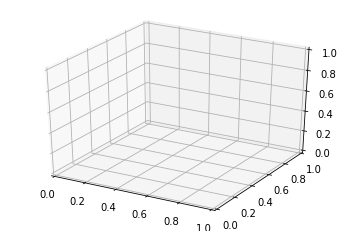

In [112]:
ax = plt.axes(projection='3d')
ax.plot_surface(X = [100, 200, 300, 400, 500, 600, 700], 
                Y = ["A", "A", "A", "A", "A", "A", "A",
                     "A", "A", "A", "A", "A", "A", "A",
                     "A", "A", "A", "A", "A", "A", "A",
                     "A", "A", "A", "A", "A", "A", "A",
                     "A", "A", "A"], Z = Penalty_Time.Penalty.values.reshape(31, 7), cmap='viridis')
plt.show()

In [ ]:
fig  = go.Figure()

for i in range(31):
    fig.add_trace(go.Scatter(x = time3D[0][i][0], y = penalty3D[0][i][0], mode = "lines+markers"))
    fig.update_layout(height=500, width=1000, title_text="Optimized 4-Dose Administration (Drug Dose in Different Time Interals)") 
    fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
    fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

ValueError: ignored

In [ ]:
X = penalty3D[:, 0]
Y = penalty3D[:, 1]
Z = penalty3D[:, 2]

fig = go.Figure(data=[go.Surface(z = Z, x=X, y=Y)])
fig.update_layout(title='Optimized Drug Administration for 4 Different Dosages in 24 hours', autosize=False,
                  width=1200, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
fig  = go.Figure()

for i in range(31):
    fig.add_trace(go.Scatter(x = time3D[0][i][0], y = penalty3D[0][i][0], mode = "lines+markers"))
    fig.update_layout(height=500, width=1000, title_text="Optimized 4-Dose Administration (Drug Dose in Different Time Interals)") 
    fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, rangeslider_visible=True, linecolor='black', mirror=True)
    fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()